In [1]:
import numpy as np
import sys
import os
import glob
import getpass
import argparse
import pickle
import matplotlib.cm as cm
import matplotlib.pyplot as plt


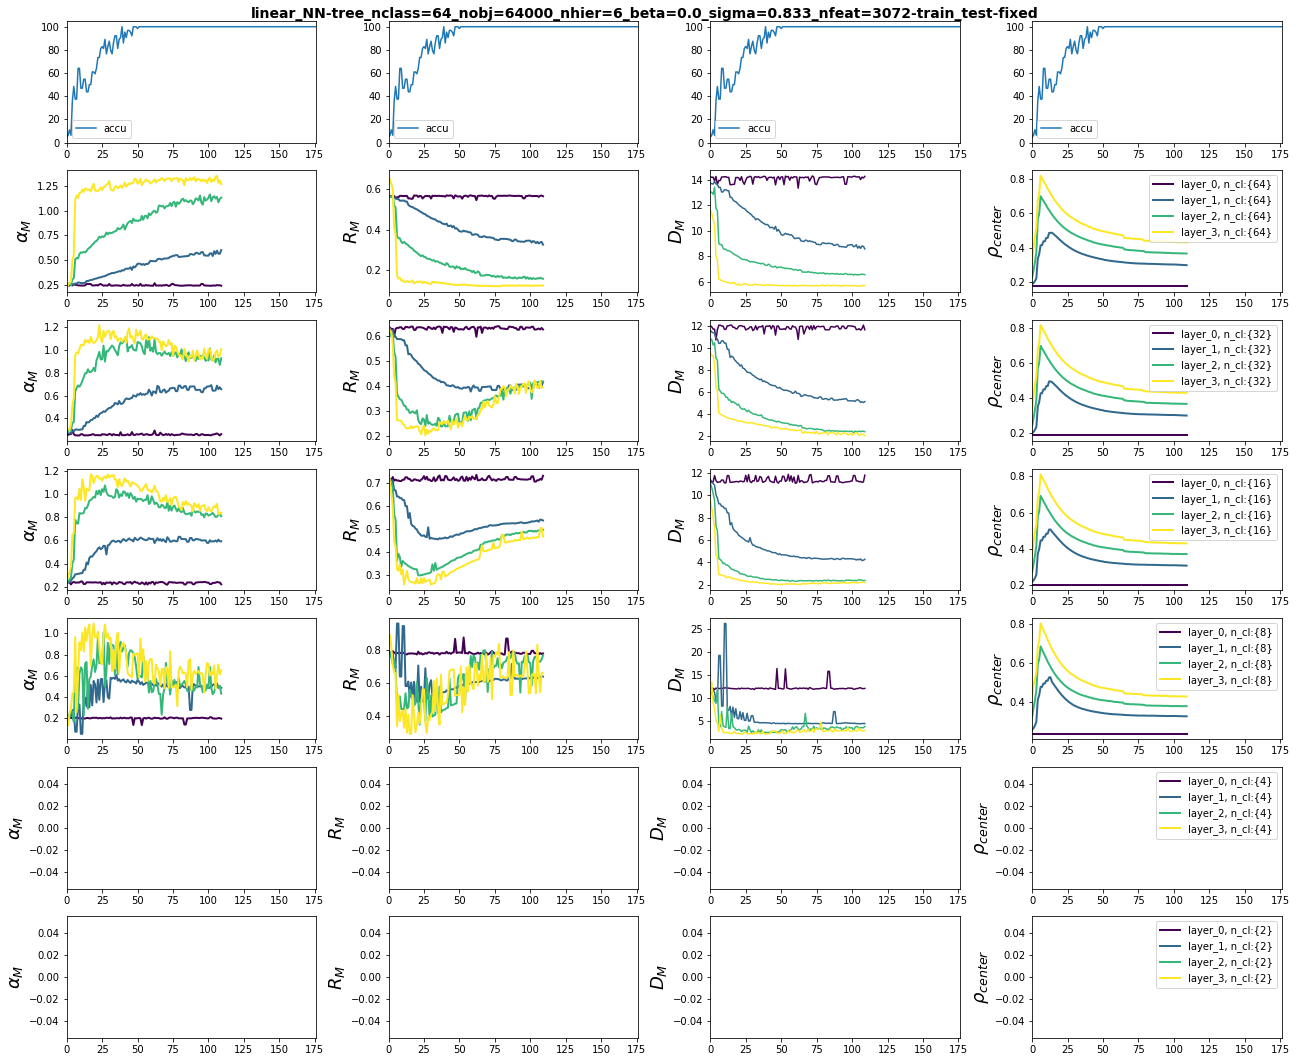

In [6]:
from utils import save_dir, analyze_dir, result_dir
model_identifier = 'linear_NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.0_sigma=0.833_nfeat=3072-train_test-fixed'
analyze_identifier= 'mftma-exm_per_class=50-proj=False-rand=False-kappa=0-n_t=300-n_rep=1'

data_=pickle.load(open(os.path.join(analyze_dir,analyze_identifier,model_identifier, f'{model_identifier}_mftma_pooled.pkl'), 'rb'))

mftma_res=data_['mftma_results']
#if not os.path.exists(os.path.join(result_dir,analyze_identifier,model_identifier)):
#        os.makedirs(os.path.join(result_dir,analyze_identifier,model_identifier))
temp=[np.asarray([x['seq'] for x in mftma_res[y]]) for y in mftma_res.keys()]
y=temp[0]
for k in temp:
    y=np.intersect1d(y,k)


num_hier=np.unique([len(x['mftma']) for x in mftma_res['layer_0_Input']])
fig, axes = plt.subplots(6+1, 4, figsize=(18, 15))
axes=axes.flatten()
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
seq=[x['seq'] for x in mftma_res['layer_0_Input']]
accu=[x['test_acc'] for x in mftma_res['layer_0_Input']]
for k in range(4):
    im=axes[k].plot(seq,accu)
    axes[k].legend(['accu'])
    axes[k].set_xlim(min(seq), max(seq))
for k in range(int(num_hier)):
    temp=[[x['mftma'][k]['capacities'] for x in mftma_res[y]] for y in mftma_res.keys()]
    temp1=[[x['mftma'][k]['n_hier_class'] for x in mftma_res[y]] for y in mftma_res.keys()]
    hier_level=[set(x) for x in temp1]
    cap=[[x[int(k)] for k in y ] for x in temp]
    seq_temp=[seq[int(k)] for k in y ]
    h0=cm.get_cmap('viridis_r',len(cap))
    h0_c=np.flipud(h0(np.arange(len(cap))/len(cap)))
    for i,c in enumerate(cap):
        im=axes[4*(k+1)].plot(seq_temp,c,color=h0_c[i,:],label=str(i)+'n_class:'+str(hier_level[i]),linewidth=2)
    axes[4*(k+1)].set_ylabel(r'$\alpha_M$', fontsize=18)
    axes[4*(k+1)].set_xlim(min(seq), max(seq))
    #fig.colorbar(im, ax=axes[4*(k+1)])
    
    
    temp=[[x['mftma'][k]['radii'] for x in mftma_res[y]] for y in mftma_res.keys()]
    rad=[[x[int(k)] for k in y ] for x in temp]
    for i,c in enumerate(rad):
        im=axes[4*(k+1)+1].plot(seq_temp,c,color=h0_c[i,:],label=str(i),linewidth=2)
    axes[4*(k+1)+1].set_ylabel(r'$R_M$', fontsize=18)
    axes[4*(k+1)+1].set_xlim(min(seq), max(seq))
    
    temp=[[x['mftma'][k]['dimensions'] for x in mftma_res[y]] for y in mftma_res.keys()]
    dim=[[x[int(k)] for k in y ] for x in temp]
    for i,c in enumerate(dim):
        im=axes[4*(k+1)+2].plot(seq_temp,c,color=h0_c[i,:],label=str(i))
    
    axes[4*(k+1)+2].set_ylabel(r'$D_M$', fontsize=18)
    axes[4*(k+1)+2].set_xlim(min(seq), max(seq))
    
    temp=[[x['mftma'][k]['correlations'] for x in mftma_res[y]] for y in mftma_res.keys()]
    cor=[[x[int(k)] for k in y ] for x in temp]
    for i,c in enumerate(cor):
        im=axes[4*(k+1)+3].plot(seq_temp,c,color=h0_c[i,:],label='layer_'+str(i)+', n_cl:'+str(hier_level[i]),linewidth=2)
        
    axes[4*(k+1)+3].set_ylabel(r'$\rho_{center}$', fontsize=18)
    axes[4*(k+1)+3].legend()
    axes[4*(k+1)+3].set_xlim(min(seq), max(seq))

plt.suptitle(model_identifier,fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(result_dir,analyze_identifier,model_identifier+'_manifold_vals_during_training.png'),transparent=True)


NameError: name 'mftma_esult_dirs' is not defined

In [4]:
fig, axes = plt.subplots(5, len(mftma_resresult_dirs()), figsize=(18, 15))
axes=axes.flatten()
for k in range(4):
    im=axes[k].plot(seq,accu)
    axes[k].legend(['accu'])
    axes[k].set_xlim(min(seq), max(seq))
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['capacities'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[4+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[4+j].set_ylabel(r'$\alpha_M$', fontsize=18)
    axes[4+j].set_xlim(min(seq), max(seq))
    axes[4+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    #axes[4+j].legend()
    axes[4+j].set_title(key)
    #fig.colorbar(im, ax=axes[4*(k+1)])

idx=8
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['radii'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$R_M$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))

    axes[idx+j].set_title(key)

idx=12
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['dimensions'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$D_M$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    
    axes[idx+j].set_title(key)

idx=16
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['correlations'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$\rho_{center}$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    axes[idx+j].legend()
    axes[idx+j].set_title(key)

plt.suptitle(model_identifier)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(result_dir,analyze_identifier,model_identifier+'_hierarchy_vals_during_training.png'),transparent=True)

NameError: name 'mftma_resresult_dirs' is not defined

# training accurary for different sigma and beta 

In [8]:
from utils import save_dir, analyze_dir

In [21]:
struct_list=['partition','tree']
nhier=[1,6]
beta=[0.0, 0.016, 0.033, 0.05]
sigma=[0.0, 0.833, 1.667, 2.5]
nclass=[64,96]
model_train_test_acc=[]
for b in beta:
    for s in sigma:
        for n in nclass:
            for idx , struct in enumerate(struct_list):
                model=f"NN-{struct_list[idx]}_nclass={n}_nobj={n * 1000}_nhier={nhier[idx]}_beta={b}_sigma={s}_nfeat=3072-train_test-fixed"
                model_train_acc=f'acc_train_{model}.csv'
                model_test_acc=f'acc_test_{model}.csv'
                train=open(os.path.join(save_dir,model,model_train_acc),'r')
                train_lines=[float(x) for x in train.read().splitlines()]
                train.flush()
                test=open(os.path.join(save_dir,model,model_test_acc),'r')
                test_lines=[float(x) for x in test.read().splitlines()]
                test.flush()

                model_train_test_acc.append(dict(beta=b,sigma=s,nclass=n,structure=struct,n_hier=nhier[idx],name=model,train_acc=train_lines,test_acc=test_lines))

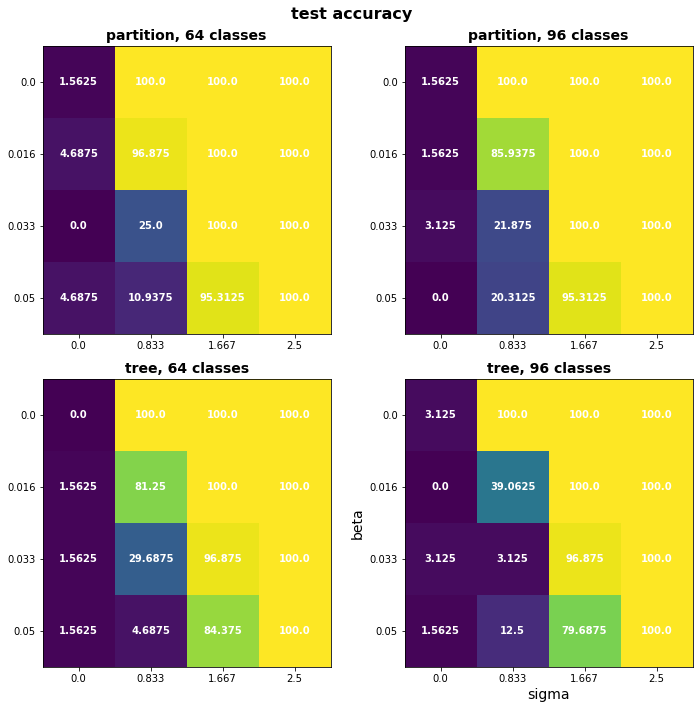

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes=axes.flatten()
st='partition'
ncl=64
ax=axes[0]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')


st='partition'
ncl=96
ax=axes[1]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')


st='tree'
ncl=64
ax=axes[2]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')

st='tree'
ncl=96
ax=axes[3]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')

ax.set_xlabel('sigma',fontsize=14)
ax.set_ylabel('beta',fontsize=14)
plt.suptitle('test accuracy',fontsize=16,fontweight='bold')
fig.tight_layout()

if not os.path.exists(os.path.join(result_dir,'training_result')):
        os.mkdir(os.path.join(result_dir,'training_result'))
fig.savefig(os.path.join(result_dir,'training_result',f'test_accu_structures:partition,tree_betas:{b_val.min()},{b_val.max()}_sigmas:{s_val.min()},{s_val.max()}.png'),transparent=True)